In [1]:
# Dependencies
import pandas as pd 
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# Import file and read csv
file = "Resources/gender_obesity.csv"

o_df = pd.read_csv(file)
o_df


,ID,YearStart,YearEnd,Description,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,...,StratificationId2,StratificationCategory3,StratificationCategoryId3,Stratification3,StratificationId3,LocationDisplayOrder,FootnoteSymbol,FootnoteText,URL,FootnoteHeading
0,193288.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,193289.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,193368.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,193369.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,193395.0,2020.0,2020.0,2020.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Division of Nutrition, Physical Activity, and ...",/nccdphp/dnpao/index.html,Related Links
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Physical Activity,/physicalactivity/index.html,Related Links
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chronic Disease Prevention and Health Promotion,/chronicdisease/index.htm,Related Links
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overweight and Obesity,/obesity/index.html,Related Links


In [3]:
# List columns
o_df.columns

Index(['ID', 'YearStart', 'YearEnd', 'Description', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Class', 'Topic', 'Question', 'Response',
       'Data_Value_Unit', 'DataValueTypeId', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'GeoLocation_Lat', 'GeoLocation_Long', 'ClassId', 'TopicId',
       'QuestionId', 'ResponseId', 'StratficationCategory1',
       'StratificationCategoryId1', 'Stratification1', 'StratificationId1',
       'StratificationCategory2', 'StratificationCategoryId2',
       'Stratification2', 'StratificationId2', 'StratificationCategory3',
       'StratificationCategoryId3', 'Stratification3', 'StratificationId3',
       'LocationDisplayOrder', 'FootnoteSymbol', 'FootnoteText', 'URL',
       'FootnoteHeading'],
      dtype='object')

In [4]:
# Delete extraneous columns
o_clean_df = o_df[['Description','LocationDesc','Class', 'Question','Data_Value','Stratification1']]
o_clean_df

,Description,LocationDesc,Class,Question,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
...,...,...,...,...,...,...
112,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Identify empty rows
o_clean_df.count()

Description        108
LocationDesc       108
Class              108
Question           108
Data_Value         108
Stratification1    108
dtype: int64

In [6]:
# Remove empty rows
o_clean_df = o_clean_df.dropna(how='any')

In [7]:
o_clean_df

,Description,LocationDesc,Class,Question,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
...,...,...,...,...,...,...
103,2020.0,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.4,Female
104,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
105,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,Female
106,2020.0,Puerto Rico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,Male


In [8]:
# Rename columns
o_clean_df = o_clean_df.rename(columns={"Description":"Year","LocationDesc":"State","Data_Value":"Obese Average (%)","Stratification1":"Gender"})
o_clean_df
                                           

,Year,State,Class,Question,Obese Average (%),Gender
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
...,...,...,...,...,...,...
103,2020.0,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.4,Female
104,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
105,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,Female
106,2020.0,Puerto Rico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,Male


In [9]:
# Remove national rows
o_final_df = o_clean_df.drop(o_clean_df.index[[0,1]])
o_final_df

,Year,State,Class,Question,Obese Average (%),Gender
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
5,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.6,Female
6,2020.0,Arizona,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.8,Male
...,...,...,...,...,...,...
103,2020.0,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.4,Female
104,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
105,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,Female
106,2020.0,Puerto Rico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,Male


In [10]:
# Organize dataframe by obese average
highest = o_final_df.sort_values("Obese Average (%)", ascending=False)
highest

,Year,State,Class,Question,Obese Average (%),Gender
51,2020.0,Mississippi,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,42.8,Female
98,2020.0,West Virginia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.6,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
39,2020.0,Louisiana,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.8,Female
83,2020.0,South Carolina,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.4,Female
...,...,...,...,...,...,...
12,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.3,Male
13,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.1,Female
45,2020.0,Massachusetts,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.4,Female
25,2020.0,Hawaii,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,22.3,Female


In [11]:
# Organize by lowest obese average
lowest = o_final_df.sort_values("Obese Average (%)")
lowest

,Year,State,Class,Question,Obese Average (%),Gender
18,2020.0,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,19.1,Male
25,2020.0,Hawaii,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,22.3,Female
45,2020.0,Massachusetts,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.4,Female
13,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.1,Female
12,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.3,Male
...,...,...,...,...,...,...
83,2020.0,South Carolina,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.4,Female
39,2020.0,Louisiana,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.8,Female
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
98,2020.0,West Virginia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.6,Male


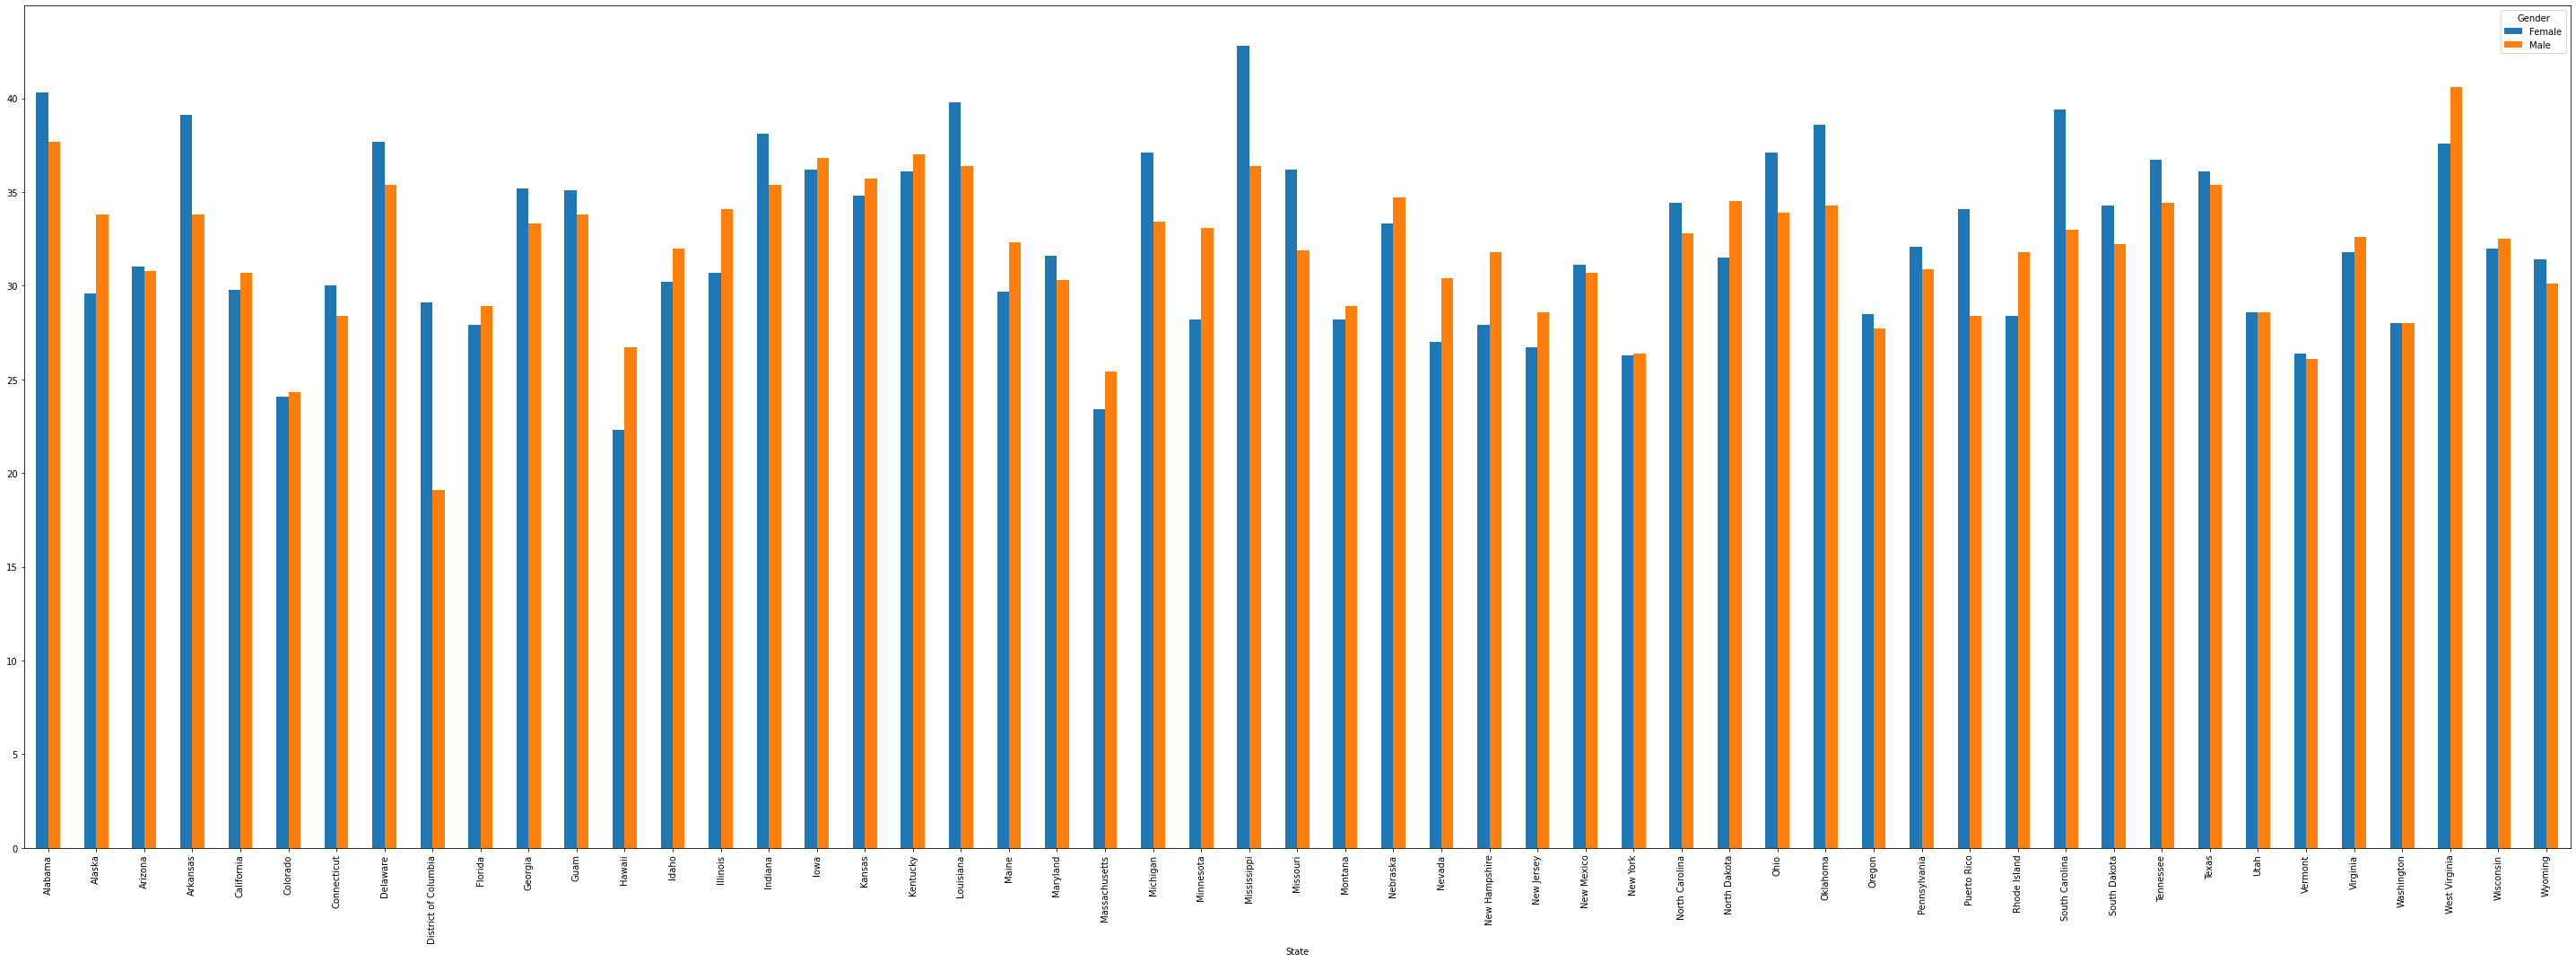

In [17]:
# Create bar chart showing obesity % for each state by gender
# Filter dataframe down to state, obesity, and gender
o_final_df.pivot(index='State', columns='Gender', values='Obese Average (%)').plot(kind='bar', figsize=(40,15))
plt.title('State Obesity by Gender')
plt.tight_layout()
# Save 
plt.savefig("Resources/state_gender_obesity.png")
plt.show()

In [13]:
# Create table for stacked bar chart
pivot = pd.pivot_table(data=o_final_df, index=['State'], columns=['Gender'], values='Obese Average (%)')
pivot.head()

Gender,Female,Male
State,,
Alabama,40.3,37.7
Alaska,29.6,33.8
Arizona,31.0,30.8
Arkansas,39.1,33.8
California,29.8,30.7


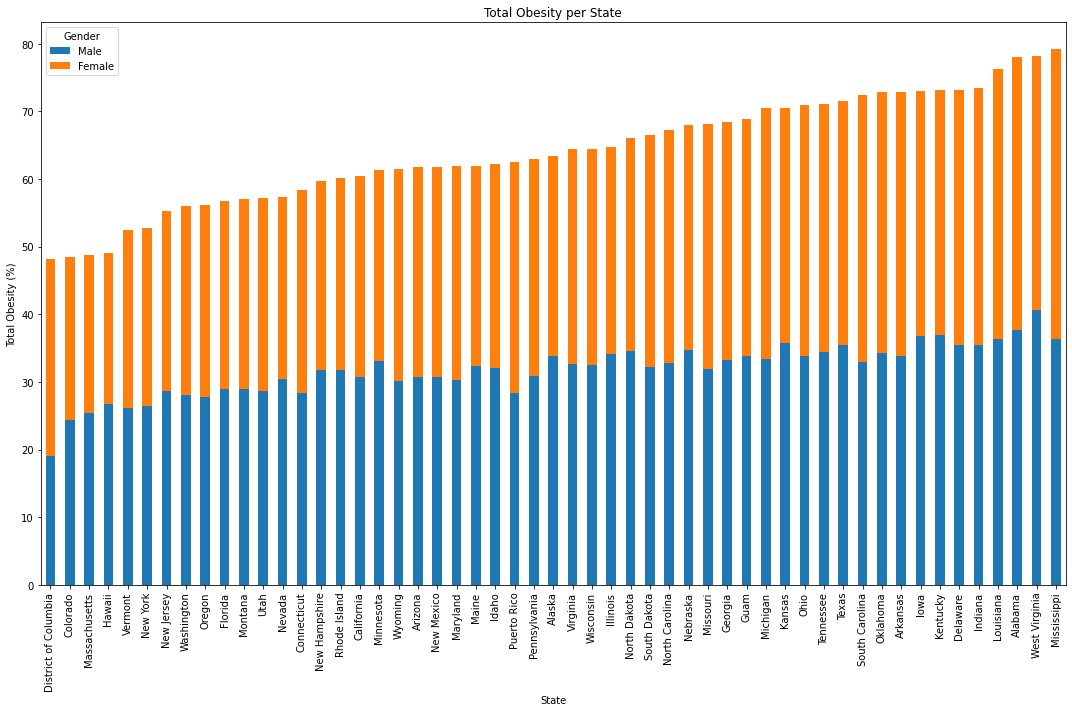

In [16]:
# Create a stacked bar chart showing the state with the lowest levels of obesity.
pivot['total'] = pivot.sum(axis=1)

pivot.sort_values('total', inplace=True)
chart = pivot[['Male','Female']].plot(kind='bar', stacked=True, color=['tab:blue', 'tab:orange'], figsize=[15,10])
plt.ylabel('Total Obesity (%)')
plt.title('Total Obesity per State')
plt.tight_layout()


plt.savefig("Resources/state_healthiest_obesity.png")
plt.show()